##Import Libraries

In [46]:
import keras # for modeling the nueral network
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd # for getting data from csv
from numpy import mean,std # for calculating standard deviation of MSE
from sklearn.model_selection import train_test_split # for split train and test sets
from sklearn.metrics import mean_squared_error # for evaluating the model
import matplotlib.pyplot as plt # for plotting MSE data

##Downloading the csv file

In [2]:
!wget https://cocl.us/concrete_data

--2020-06-19 02:03:11--  https://cocl.us/concrete_data
Resolving cocl.us (cocl.us)... 161.202.50.39, 119.81.168.75, 119.81.168.76
Connecting to cocl.us (cocl.us)|161.202.50.39|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv [following]
--2020-06-19 02:03:12--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58988 (58K) [text/csv]
Saving to: ‘concrete_data’

concrete_data       100%[===================>]  57.61K   194KB/s    in 0.3s    

2020-06-19 02:03:13 (194 

##Reading the data

In [5]:
data=pd.read_csv("/content/concrete_data")

In [6]:
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


##Getting data ready for training

In [10]:
data_columns = data.columns
predictors = data[data_columns[data_columns != 'Strength']]# all columns except Strength & Age
predictors_columns = predictors.columns
predictors = predictors[predictors_columns[predictors_columns != 'Age']]# all columns except Strength & Age
target = data['Strength'] # Strength column

In [11]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5


In [12]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [14]:
n_cols=predictors.shape[1] # for NL
predictors.shape

(1030, 7)

##Normalizing the data

In [15]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569


#Part(A) ->> Keras Baseline model

In [17]:
# Baseline model
def k_reg_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))
    
    # compiling the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

###Spliting data to test and train sets

In [24]:
X_train, X_test, y_train, y_test = train_test_split(predictors,target,test_size=0.3,shuffle=True) 
#holding 30% of the data for testing with shuffling is true for randoming

###Building the model & Training

In [25]:
reg_model=k_reg_model()

In [ ]:
reg_model.fit(X_train, y_train, epochs=50, verbose=0)
#last_loss_value=reg_model.history.history["loss"][-1]

###Evaluate the model

In [37]:
y_predict=reg_model.predict(X_test)
mean_squared_error(y_test, y_predict)

778.8746144750937

###Getting 50 MSE values 

In [38]:
mse_values=[]
for i in range(50):
  X_train, X_test, y_train, y_test = train_test_split(predictors,target,test_size=0.3,shuffle=True) 
  reg_model=k_reg_model()
  reg_model.fit(X_train, y_train, epochs=50, verbose=0)
  y_predict=reg_model.predict(X_test)
  err=mean_squared_error(y_test, y_predict)
  mse_values.append(err)

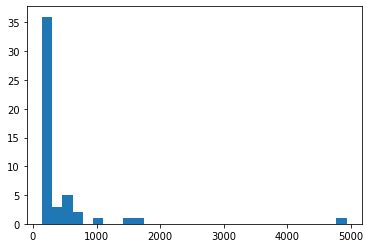

In [52]:
plt.hist(mse_values,bins = 30)
plt.show()

In [54]:
min(mse_values)

144.83061857890974

It's all in range 0:1000 a=with some stray data with minimum 144.8



###Reporting the mean and the standard deviation of MSE value

In [48]:
print("The mean of MSE is {}".format(mean(mse_values)))
print("The STD of MSE is {}".format(std(mse_values)))

The mean of MSE is 418.61342310920935
The STD of MSE is 715.5581652787045


#Part(B) ->> Repeating Part (A) but with Normalized Data

In [49]:
#Spliting data to test and train sets
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(predictors_norm,target,test_size=0.3,shuffle=True) 
#Building model & Evaluating
reg_model=k_reg_model()
reg_model.fit(X_train_norm, y_train_norm, epochs=50, verbose=0)
y_predict_norm=reg_model.predict(X_test_norm)
mean_squared_error(y_test_norm, y_predict_norm)

309.04296685636217

Far Better than part A result

In [50]:
mse_norm_values=[]
for i in range(50):
  X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(predictors_norm,target,test_size=0.3,shuffle=True) 
  reg_model=k_reg_model()
  reg_model.fit(X_train_norm, y_train_norm, epochs=50, verbose=0)
  y_predict_norm=reg_model.predict(X_test_norm)
  err_norm=mean_squared_error(y_test_norm, y_predict_norm)
  mse_norm_values.append(err_norm)

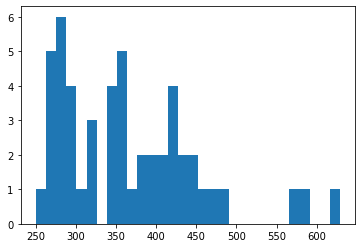

In [53]:
plt.hist(mse_norm_values,bins = 30)
plt.show()

In [55]:
min(mse_norm_values)

249.90616375702487

#####Now the range closed between 250 and 500 with stray data around 575 with minimum 249 .. that doesn't mean that without nomalization is better.
#####We will have to calculate the mean and std to check which is better

In [56]:
print("The mean of MSE normalized is {}".format(mean(mse_norm_values)))
print("The STD of MSE normalized is {}".format(std(mse_norm_values)))

The mean of MSE normalized is 365.941765775836
The STD of MSE normalized is 85.70299386230323


#####Now both mean and std are fat better than without normalizing data

#Part (C) ->> Part B but with 100 epoches

In [58]:
#Spliting data to test and train sets
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(predictors_norm,target,test_size=0.3,shuffle=True) 
#Building model & Evaluating
reg_model=k_reg_model()
reg_model.fit(X_train_norm, y_train_norm, epochs=100, verbose=0)
y_predict_norm=reg_model.predict(X_test_norm)
mean_squared_error(y_test_norm, y_predict_norm)

183.6513111593797

In [59]:
mse_norm_values=[]
for i in range(50):
  X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(predictors_norm,target,test_size=0.3,shuffle=True) 
  reg_model=k_reg_model()
  reg_model.fit(X_train_norm, y_train_norm, epochs=100, verbose=0)
  y_predict_norm=reg_model.predict(X_test_norm)
  err_norm=mean_squared_error(y_test_norm, y_predict_norm)
  mse_norm_values.append(err_norm)

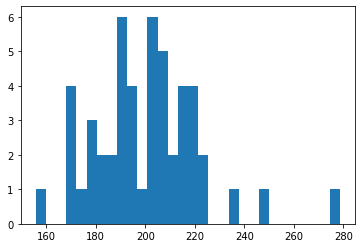

In [60]:
plt.hist(mse_norm_values,bins = 30)
plt.show()

In [61]:
print("The mean of MSE normalized is {}".format(mean(mse_norm_values)))
print("The STD of MSE normalized is {}".format(std(mse_norm_values)))

The mean of MSE normalized is 200.64428021166205
The STD of MSE normalized is 21.272666895411472


Now , it's down to become between range of 160 and 280

we can see that increasing the number of epoches reduces the MSE efficiently

#Part (D) ->> Part B but with 3  hidden layers

In [63]:
# Baseline model
def k_reg_model_three_layers():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    
    # compiling the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [64]:
#Spliting data to test and train sets
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(predictors_norm,target,test_size=0.3,shuffle=True) 
#Building model & Evaluating
reg_model=k_reg_model_three_layers() ## new model
reg_model.fit(X_train_norm, y_train_norm, epochs=100, verbose=0)
y_predict_norm=reg_model.predict(X_test_norm)
mean_squared_error(y_test_norm, y_predict_norm)

169.75954690930635

In [65]:
mse_norm_values=[]
for i in range(50):
  X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(predictors_norm,target,test_size=0.3,shuffle=True) 
  reg_model=k_reg_model_three_layers()
  reg_model.fit(X_train_norm, y_train_norm, epochs=100, verbose=0)
  y_predict_norm=reg_model.predict(X_test_norm)
  err_norm=mean_squared_error(y_test_norm, y_predict_norm)
  mse_norm_values.append(err_norm)

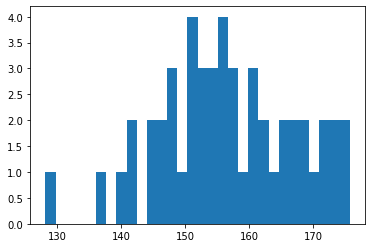

In [66]:
plt.hist(mse_norm_values,bins = 30)
plt.show()

In [67]:
print("The mean of MSE normalized is {}".format(mean(mse_norm_values)))
print("The STD of MSE normalized is {}".format(std(mse_norm_values)))

The mean of MSE normalized is 156.57748090965006
The STD of MSE normalized is 10.599242400459143


Three Hidden Layers with 100 epoches and normalized data gives us good results on concrete dataset.